**1. DATA CLEANSING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('student_depression_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

memeriksa nilai kosong

In [2]:
print("Missing Values per Column:", df.isnull().sum())

Missing Values per Column: id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


menghapus data duplikat

In [3]:
df.drop_duplicates()
df.drop(columns='id')

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


penanganan data inkonsisten

In [4]:
cols_yes_no = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in cols_yes_no:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].replace({'yes': 'Yes', 'no': 'No'})

print("Penanganan Data Inkonsisten (setelah koreksi):", df[cols_yes_no].drop_duplicates())


Penanganan Data Inkonsisten (setelah koreksi):   Have you ever had suicidal thoughts ? Family History of Mental Illness
0                                   Yes                               No
1                                    No                              Yes
3                                   Yes                              Yes
5                                    No                               No


mengoreksi nilai tidak valid

In [5]:
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df = df[(df['Age'] >= 15) & (df['Age'] <= 50)]
    print("Jumlah data setelah membuang nilai usia tidak valid:", df.shape[0])

Jumlah data setelah membuang nilai usia tidak valid: 27896


mengganti nilai tidak valid

In [6]:
targets = ['??', 'N/A', 'n/a', 'unknown', 'Unknown']
df.replace(targets, np.nan, inplace=True)
print(df.isin(targets).sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


memeriksa outlier

In [7]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    print(f"Outlier dibuang dari kolom '{col}': {before - after}")

print("Jumlah data setelah buang outlier:", df.shape[0])

Outlier dibuang dari kolom 'id': 0
Outlier dibuang dari kolom 'Age': 7
Outlier dibuang dari kolom 'Academic Pressure': 0
Outlier dibuang dari kolom 'Work Pressure': 3
Outlier dibuang dari kolom 'CGPA': 6
Outlier dibuang dari kolom 'Study Satisfaction': 0
Outlier dibuang dari kolom 'Job Satisfaction': 2
Outlier dibuang dari kolom 'Work/Study Hours': 0
Outlier dibuang dari kolom 'Depression': 0
Jumlah data setelah buang outlier: 27878


**2. DATA TRANSFORMATION**

Label Encoding:

mengubah kolom dengan tipe data Kategorikal fitur Biner: 'Gender', 'Have you ever had suicidal thoughts?', dan 'Family History of Mental Illness'

df['Gender'] = df['Gender'].map(
    {'Male': 0,
     'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(
    {'Yes': 1,
     'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(
    {'Yes': 1,
     'No': 0})

In [8]:
df['Gender'] = df['Gender'].map(
    {'Male': 0,
     'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(
    {'Yes': 1,
     'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(
    {'Yes': 1,
     'No': 0})

In [9]:
print("Gender: ")
print(df['Gender'].head())

print("Have you ever had suicidal thoughts?: ")
print(df['Have you ever had suicidal thoughts ?'].head())

print("Family History of Mental Illness: ")
print(df['Family History of Mental Illness'].head())

Gender: 
0    0
1    1
2    0
3    1
4    1
Name: Gender, dtype: int64
Have you ever had suicidal thoughts?: 
0    1
1    0
2    0
3    1
4    1
Name: Have you ever had suicidal thoughts ?, dtype: int64
Family History of Mental Illness: 
0    0
1    1
2    1
3    1
4    0
Name: Family History of Mental Illness, dtype: int64


One-Hot Encoding

untuk mengubah kolom dengan Kategorikal Nominal yaitu 'City', 'Profession', 'Degree', 'Sleep Duration', dan 'Dietary Habits'

In [10]:
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree', 'Sleep Duration', 'Dietary Habits'])
df.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_PhD,Sleep Duration_'5-6 hours',Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,2,0,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,False,True,False,False,False,False,True,False,False,False
1,8,1,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,False,True,False,False,False,False,False,True,False,False
2,26,0,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,False,False,False,True,False,False,True,False,False,False
3,30,1,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,False,False,True,False,False,False,False,True,False,False
4,32,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,False,True,False,False,False,False,False,True,False,False


Normalization dengan MinMaxScaler

untuk mengubah nilai fitur (Depression) ke dalam rentang 0 - 1

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Depression'] = scaler.fit_transform(df[['Depression']])
df.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_PhD,Sleep Duration_'5-6 hours',Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,2,0,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,False,True,False,False,False,False,True,False,False,False
1,8,1,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,False,True,False,False,False,False,False,True,False,False
2,26,0,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,False,False,False,True,False,False,True,False,False,False
3,30,1,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,False,False,True,False,False,False,False,True,False,False
4,32,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,False,True,False,False,False,False,False,True,False,False


Handling Missing Values

dengan mengecek Missing Value dan mengisi missing value jika ada

In [12]:
df.isnull().sum()

id                          0
Gender                      0
Age                         0
Academic Pressure           0
Work Pressure               0
                           ..
Sleep Duration_Others       0
Dietary Habits_Healthy      0
Dietary Habits_Moderate     0
Dietary Habits_Others       0
Dietary Habits_Unhealthy    0
Length: 116, dtype: int64

**3. DATA REDUCTION**

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [14]:
df.nunique()

id                          27878
Gender                          2
Age                            25
Academic Pressure               6
Work Pressure                   1
                            ...  
Sleep Duration_Others           2
Dietary Habits_Healthy          2
Dietary Habits_Moderate         2
Dietary Habits_Others           2
Dietary Habits_Unhealthy        2
Length: 116, dtype: int64

In [15]:
numeric_cols = [ 'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA']
df_pca = df[numeric_cols]

In [16]:
print(df_pca.dtypes)
print(df_pca.apply(lambda x: x.unique()))

Gender                 int64
Age                  float64
Academic Pressure    float64
Work Pressure        float64
CGPA                 float64
dtype: object
Gender                                                          [0, 1]
Age                  [33.0, 24.0, 31.0, 28.0, 25.0, 29.0, 30.0, 27....
Academic Pressure                       [5.0, 2.0, 3.0, 4.0, 1.0, 0.0]
Work Pressure                                                    [0.0]
CGPA                 [8.97, 5.9, 7.03, 5.59, 8.13, 5.7, 9.54, 8.04,...
dtype: object


In [17]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

In [18]:
print(df['Financial Stress'].isnull().sum())

3


In [19]:
print(df['Financial Stress'].isnull().sum())

3


In [20]:
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'])

In [21]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Kolom numerik yang siap diproses:", list(numerical_cols))

Kolom numerik yang siap diproses: ['id', 'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [22]:
scaler = StandardScaler()
scaler.fit_transform(df_pca)

array([[-0.89136327,  1.47365649,  1.34546919,  0.        ,  0.89550981],
       [ 1.12187705, -0.37137026, -0.82715974,  0.        , -1.20071362],
       [-0.89136327,  1.06365054, -0.1029501 ,  0.        , -0.42913953],
       ...,
       [-0.89136327,  1.06365054, -0.1029501 ,  0.        , -0.71591928],
       [ 1.12187705, -1.60138809,  1.34546919,  0.        , -0.53156087],
       [-0.89136327,  0.24363866,  0.62125955,  0.        ,  1.07986822]])

In [23]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [24]:
df[numeric_cols].head(5)

,Gender,Age,Academic Pressure,Work Pressure,CGPA
0,0,33.0,5.0,0.0,8.97
1,1,24.0,2.0,0.0,5.90
2,0,31.0,3.0,0.0,7.03
3,1,28.0,3.0,0.0,5.59
4,1,25.0,4.0,0.0,8.13


In [25]:
principalDf

,PC1,PC2
0,7.146000,0.898892
1,-1.788088,-1.507763
2,5.189731,-0.615240
3,2.187012,-2.025772
4,-0.831044,0.297213
...,...,...
27873,1.141018,-2.240902
27874,1.218197,1.925297
27875,5.189003,-1.027600
27876,-7.854570,-1.076380


In [26]:
print("Variansi per komponen:", pca.explained_variance_ratio_)
print("Total variansi terjaga:", sum(pca.explained_variance_ratio_))

Variansi per komponen: [0.84742437 0.07670386]
Total variansi terjaga: 0.9241282293081694


In [27]:
df_sample = df.sample(frac=0.8, random_state=42)

In [28]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22302 entries, 27349 to 2787
Columns: 116 entries, id to Dietary Habits_Unhealthy
dtypes: bool(103), float64(9), int64(4)
memory usage: 4.6 MB


In [29]:
df_sample.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_PhD,Sleep Duration_'5-6 hours',Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
27349,137891,0,30.0,4.0,0.0,5.74,1.0,0.0,1,1.0,...,False,False,False,False,True,False,False,True,False,False
10417,52805,0,28.0,5.0,0.0,7.94,3.0,0.0,0,2.0,...,False,False,False,True,False,False,False,False,False,True
20001,101303,1,31.0,5.0,0.0,6.39,2.0,0.0,1,11.0,...,False,True,False,False,False,False,False,False,False,True
5179,26088,1,24.0,4.0,0.0,9.60,5.0,0.0,0,10.0,...,False,True,False,False,False,False,True,False,False,False
16066,81230,1,29.0,3.0,0.0,8.11,4.0,0.0,0,8.0,...,False,False,True,False,False,False,False,True,False,False


**4. DATA MODELLING**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
X = df.drop(['Depression'], axis=1)
y = df['Depression']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Hasil Prediksi (y_pred):")
print(y_pred)

Hasil Prediksi (y_pred):
[0.87309743 0.36452851 1.12740469 ... 0.6913277  0.97822677 0.99135705]


**5. DATA EVALUATION**

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.26810256833586926
Mean Squared Error (MSE): 0.11793446245089835
R-squared (R2): 0.5143424921851003


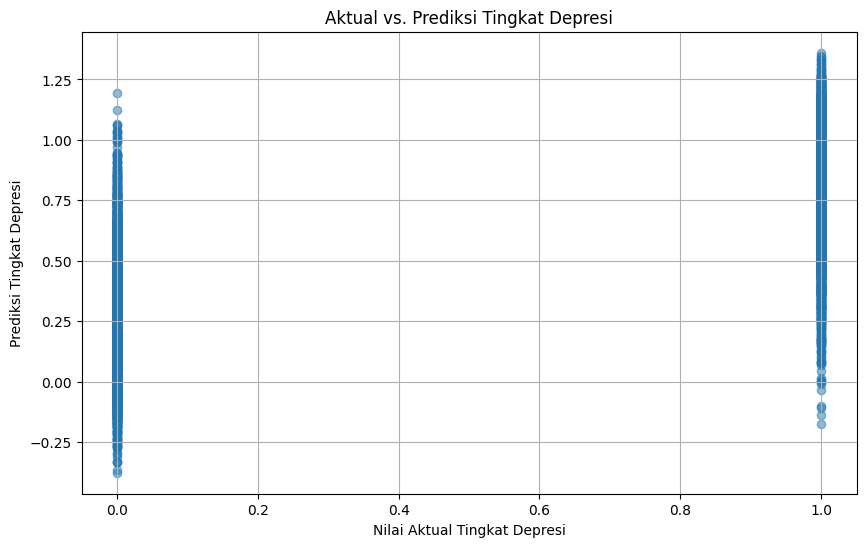

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Aktual Tingkat Depresi")
plt.ylabel("Prediksi Tingkat Depresi")
plt.title("Aktual vs. Prediksi Tingkat Depresi")
plt.grid(True)
plt.show()

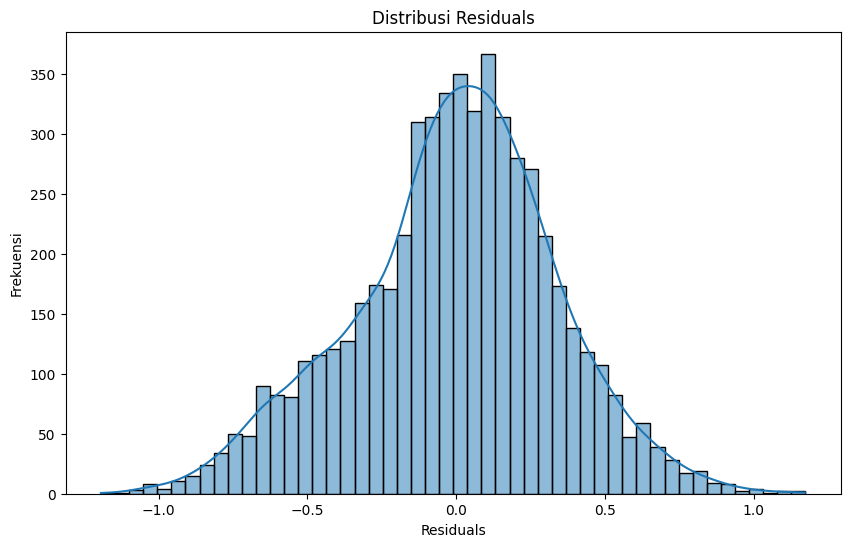

In [40]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residuals")
plt.show()

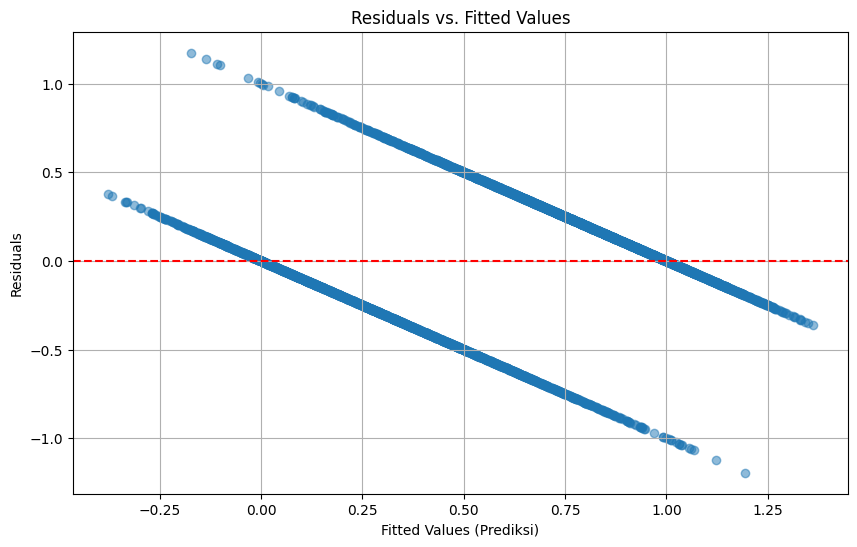

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Fitted Values (Prediksi)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

**6. DATA DEPLOYMENT**

In [42]:
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()
model.fit(X_train, y_train)  

joblib.dump(model, 'linear_regression_model.pkl')         
joblib.dump(scaler, 'minmax_scaler.pkl')                  
joblib.dump(X.columns.tolist(), 'X_train_cols.pkl')  

['X_train_cols.pkl']

In [43]:
!ngrok config add-authtoken  2wwBRB4AGdfGC4Ys1FTD08ui55j_6JXQz1CZCH3houhHre2q6

Authtoken saved to configuration file: C:\Users\nayla\AppData\Local/ngrok/ngrok.yml


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib 

# Fungsi untuk memuat model, scaler, dan daftar kolom
@st.cache_resource
def load_artifacts():
    try:
        model = joblib.load('linear_regression_model.pkl')
        scaler = joblib.load('minmax_scaler.pkl')
        X_train_cols = joblib.load('X_train_cols.pkl')
        return model, scaler, X_train_cols
    except FileNotFoundError:
        st.error("File model, scaler, atau kolom tidak ditemukan. Pastikan Anda telah mengunggah file-file ini.")
        return None, None, None

model, scaler, X_train_cols = load_artifacts()

if model is not None and scaler is not None and X_train_cols is not None:
    st.title("Dashboard Prediksi Tingkat Depresi Mahasiswa")

    st.sidebar.header("Input Data Mahasiswa")

    # Input dari pengguna di sidebar
    gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
    age = st.sidebar.slider("Age", 10, 100, 20)
    academic_pressure = st.sidebar.slider("Academic Pressure", 0, 100, 50)
    work_pressure = st.sidebar.slider("Work Pressure", 0, 100, 50)
    cgpa = st.sidebar.slider("CGPA", 0.0, 4.0, 3.0)
    financial_stress = st.sidebar.slider("Financial Stress", 0, 100, 50)
    suicidal_thoughts = st.sidebar.selectbox("Have you ever had suicidal thoughts?", ["Yes", "No"])
    family_history = st.sidebar.selectbox("Family History of Mental Illness", ["Yes", "No"])
    city = st.sidebar.selectbox("City", ["City A", "City B", "City C"]) 
    profession = st.sidebar.selectbox("Profession", ["Student", "Employed", "Other"]) 
    degree = st.sidebar.selectbox("Degree", ["Undergraduate", "Graduate", "PhD"])
    sleep_duration = st.sidebar.selectbox("Sleep Duration", ["Short", "Normal", "Long"]) 
    dietary_habits = st.sidebar.selectbox("Dietary Habits", ["Healthy", "Unhealthy"]) 

    # Pra-pemrosesan data input
    input_data = {
        'Gender': gender,
        'Age': age,
        'Academic Pressure': academic_pressure,
        'Work Pressure': work_pressure,
        'CGPA': cgpa,
        'Financial Stress': financial_stress,
        'Have you ever had suicidal thoughts ?': suicidal_thoughts,
        'Family History of Mental Illness': family_history,
        'City': city,
        'Profession': profession,
        'Degree': degree,
        'Sleep Duration': sleep_duration,
        'Dietary Habits': dietary_habits
    }

    input_df = pd.DataFrame([input_data])

    # Transformasi 
    input_df['Gender'] = input_df['Gender'].map({'Male': 0, 'Female': 1})
    input_df['Have you ever had suicidal thoughts ?'] = input_df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
    input_df['Family History of Mental Illness'] = input_df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

    # One-Hot Encoding
    input_df = pd.get_dummies(input_df, columns=['City', 'Profession', 'Degree', 'Sleep Duration', 'Dietary Habits'])

    # Pastikan semua kolom yang ada saat training ada di input_df
    for col in X_train_cols:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[X_train_cols] 


    # Prediksi
    if st.sidebar.button("Prediksi"):
        prediction = model.predict(input_df)
        st.subheader("Hasil Prediksi Tingkat Depresi:")
        predicted_depression_level = scaler.inverse_transform(prediction.reshape(-1, 1))
        st.write(f"Tingkat Depresi yang Diprediksi: {prediction[0][0]:.2f}")

        clipped_prediction = np.clip(prediction[0], 0, 10)
        result = prediction[0]
        result = max(0, min(result, 10))
        st.write(f"Tingkat Depresi yang Diprediksi: {clipped_prediction:.2f}")

        st.markdown("---")
        st.write("Dashboard ini memberikan prediksi tingkat depresi berdasarkan data input.")

else:
    st.warning("Tidak dapat memuat file model, scaler, atau kolom. Pastikan file-file tersebut ada.")

2025-06-01 23:57:41.322 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:42.124 
  command:

    streamlit run c:\Users\nayla\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-01 23:57:42.125 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:42.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:42.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:42.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:42.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 23:57:

In [ ]:
from pyngrok import ngrok
import threading
import time
import os

In [ ]:
def run_streamlit():
    os.system("streamlit run tubesdatmin.py --server.port 8501 > /dev/null 2>&1")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(10) 
public_url = ngrok.connect(addr=8501)

print(f"Streamlit app is live at: {public_url}")

t=2025-06-01T23:57:57+0700 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
t=2025-06-01T23:58:02+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: i/o timeout"


Streamlit app is live at: NgrokTunnel: "https://a39f-182-253-194-57.ngrok-free.app" -> "http://localhost:8501"
